In [1]:
# pip install "numpy<2.0"

In [2]:
# pip install spacy

In [3]:
# !python -m spacy download en_core_web_sm

### Emotion Mining (Sentiment Analysis)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np 
import pandas as pd 
import string 
import nltk
from matplotlib import pyplot as plt

In [7]:
# Read affin dictionary
afinn = pd.read_csv('Afinn.csv', sep=',', \
                       encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [11]:
afinn[afinn["value"] >= 5]

,word,value
315,breathtaking,5
1226,hurrah,5
1648,outstanding,5
2179,superb,5
2234,thrilled,5


In [8]:
afinn[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [13]:
afinn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    2477 non-null   object
 1   value   2477 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 38.8+ KB


In [15]:
book = pd.read_csv("apple.txt",on_bad_lines='skip')
book

In [11]:
[each for each in book.x]  # print the full text inh eac review 

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n            ",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you m

In [12]:
# preprocess each review

for i in range(len(book)):
    str1 = book['x'][i].strip()
    if str1:
        no_punc_str = str1.translate(str.maketrans('', '', string.punctuation))
    book['x'][i]=no_punc_str.lower()

In [13]:
book

,x
0,its amazing battery last around 10 12 hrsbest ...
1,finally a macbook possession got it in 50k in ...
2,best laptop under 60k if you dont want any acc...
3,pros1 light weight and super fast response tim...
4,
5,i am very upset about the product as i checked...
6,reason for 1 star is i ot an defective piece t...
7,got the apple macbook air on amazon discount s...
8,white line coming on screen in just three mont...
9,bought this product recently on 5 april was wo...


In [25]:
# Convert the afinn dataframe to dictionary, affinity_scores
sentiment_lexicon= afinn.set_index('word')['value'].to_dict()
sentiment_lexicon

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

!pip install spacy

In [21]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
import spacy
nlp = spacy.load('en_core_web_sm')

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [27]:
# Sample demo
exstring = "I am excited, thrilled, very happy to purchase apple macbook. Its battery is excellent and giving high backup"
calculate_sentiment(exstring)

14

In [29]:
exstring2 =" I purchased the laptop which has worst display, expensive, unhappy and very low battery backup"
calculate_sentiment(exstring2)

-5

In [18]:
# test that it works
calculate_sentiment(text = 'The battery lasts long and no heating issues, great performance and happy with the purchase')

5

In [19]:
book.head(3)

,x
0,its amazing battery last around 10 12 hrsbest ...
1,finally a macbook possession got it in 50k in ...
2,best laptop under 60k if you dont want any acc...


In [20]:
# Calculate sentiment on all reviews
book['sentiment_value'] = book['x'].apply(calculate_sentiment)

In [21]:
book

,x,sentiment_value
0,its amazing battery last around 10 12 hrsbest ...,4
1,finally a macbook possession got it in 50k in ...,-1
2,best laptop under 60k if you dont want any acc...,14
3,pros1 light weight and super fast response tim...,16
4,,0
5,i am very upset about the product as i checked...,-7
6,reason for 1 star is i ot an defective piece t...,9
7,got the apple macbook air on amazon discount s...,6
8,white line coming on screen in just three mont...,-1
9,bought this product recently on 5 april was wo...,2


In [22]:
# how many words are in the sentence?
book['word_count'] = book['x'].str.split().apply(len)
book.head()

,x,sentiment_value,word_count
0,its amazing battery last around 10 12 hrsbest ...,4,13
1,finally a macbook possession got it in 50k in ...,-1,328
2,best laptop under 60k if you dont want any acc...,14,168
3,pros1 light weight and super fast response tim...,16,59
4,,0,0


In [23]:
book.sort_values(by='sentiment_value')

,x,sentiment_value,word_count
31,from the very beginning the battery life was h...,-7,35
5,i am very upset about the product as i checked...,-7,122
35,be careful while buying electronic products th...,-7,83
29,this is the worst apple product i have ever s...,-5,157
34,when i received within 15 days i realised the ...,-5,64
26,i have my worst nightmare with the macbook air...,-4,64
15,i bought macbook air in 2017 it was working fi...,-4,86
24,i brought this mac air on sep 2017 from past 1...,-2,69
1,finally a macbook possession got it in 50k in ...,-1,328
8,white line coming on screen in just three mont...,-1,22


In [24]:
# Descriptive stats for sentiment scores
book['sentiment_value'].describe()

count    40.000000
mean      4.075000
std       9.360001
min      -7.000000
25%      -1.000000
50%       2.000000
75%       7.250000
max      47.000000
Name: sentiment_value, dtype: float64

In [25]:
# Negative sentiment reviews
book[book['sentiment_value']<0]

,x,sentiment_value,word_count
1,finally a macbook possession got it in 50k in ...,-1,328
5,i am very upset about the product as i checked...,-7,122
8,white line coming on screen in just three mont...,-1,22
15,i bought macbook air in 2017 it was working fi...,-4,86
24,i brought this mac air on sep 2017 from past 1...,-2,69
26,i have my worst nightmare with the macbook air...,-4,64
28,i was looking for an affordable long lasting l...,-1,72
29,this is the worst apple product i have ever s...,-5,157
31,from the very beginning the battery life was h...,-7,35
34,when i received within 15 days i realised the ...,-5,64


In [26]:
book[book['sentiment_value']<=-5].head()['x'].tolist()

['i am very upset about the product as i checked my macbook 15 days back in december it didn’t start it was luckily in warranty  i took it to the service centre and they informed me the mother board and battery collapsed if it was not in warranty i had to pay 47000 i asked for replacement of the product and i was refused they got it fixed for me i don’t know why should i pay 57000 for mac quality if this is the quality and the service then i have to go to other product in january my product expiry was due they have give an extension of 3 months warranty when i had asked for 1 year very disappointed',
 'this is the worst  apple product i have ever seen 6 month after purchase of this fake book some of its keys of keyboard  stopped working so the service center  replace my keyboard with the new one but after some months with  the new replaced  keyboard some of its key again stopped working all these things happen in one year and 3 month timeline which is roughly 15 years of original purch

In [27]:
book[book['sentiment_value']>15].head()['x'].tolist()[0:3]

['pros1 light weight and super fast response time2 highly optimize which avoids any kind of process lag3 beautiful looks and feels like a prime product4 long battery life and awesome sound clarity5 purchased during amazon sale cost around 52kcons1 not enough memory2 limited softwares available3 operating system is not that userfriendlyprobably one of the best option for 50k laptops',
 'appleappleapple thats the first thing that must have flashed in you mind when you saw this product so here i have a total breif review on the laptoppros4k video editing with final cut pro x on this thing works like butter there is heating issue that i am going to go to apple service center to get it checkedeveryday works like checking mail and is just gr8the battery is just overpowered works for around 1112 hours on continuous work and 89 hours when editingthe graphics card scores 30 fps in cinebench which is not that badthe performance is also fine 280 cb processor score on cinebenchspeakers are really 

In [28]:
book['index']=range(0,len(book))

In [29]:
book.head()

,x,sentiment_value,word_count,index
0,its amazing battery last around 10 12 hrsbest ...,4,13,0
1,finally a macbook possession got it in 50k in ...,-1,328,1
2,best laptop under 60k if you dont want any acc...,14,168,2
3,pros1 light weight and super fast response tim...,16,59,3
4,,0,0,4


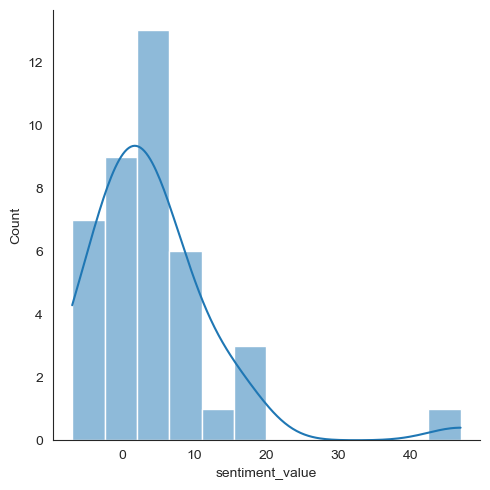

In [30]:
# Distribution plot (kde plot) for sentiment_value

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.displot(data=book,x='sentiment_value',kde=True)
plt.show()

In [31]:
book.columns

Index(['x', 'sentiment_value', 'word_count', 'index'], dtype='object')

<Axes: xlabel='None', ylabel='sentiment_value'>

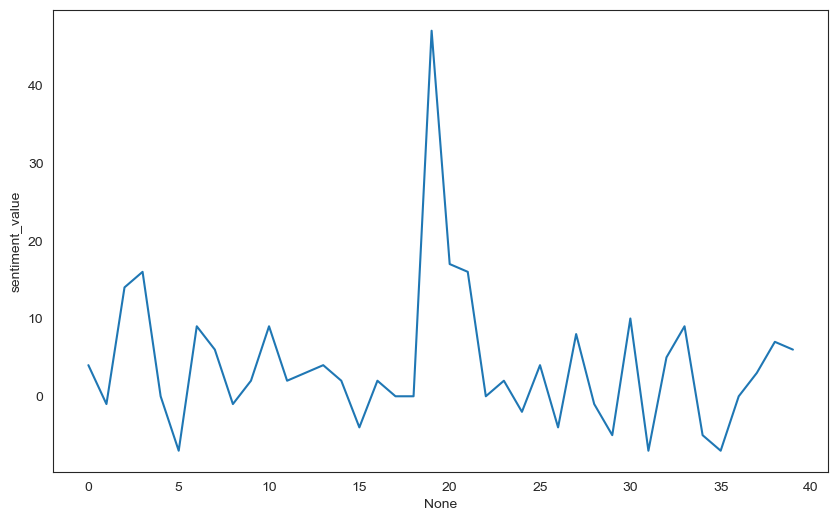

In [32]:
# Plot a line plot review no vs sentiment_value
plt.figure(figsize=(10, 6))
sns.lineplot(y='sentiment_value',x=book.index,data=book)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

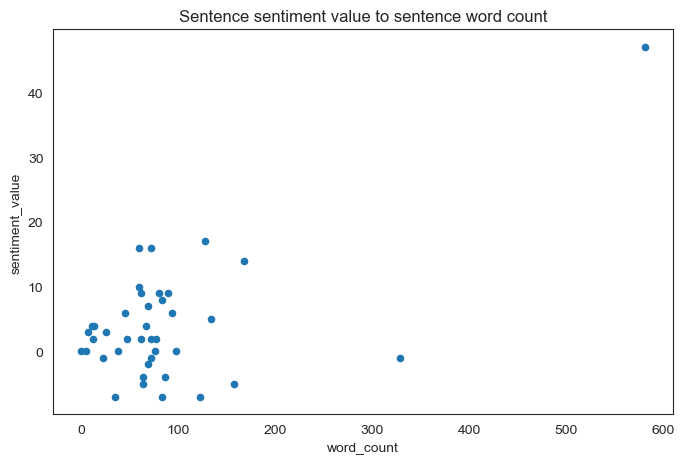

In [33]:
book.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,5), title='Sentence sentiment value to sentence word count')